In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
import ast


from src import plotting_player_location_frame, plot_field

In [75]:
df_tracking = pd.read_csv('../data/SecondSpectrum_data.csv', index_col=0) #reading tracking csv

In [154]:
df_tracking

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,live,lastTouch,ball.xyz,ball.speed
0,1,0,0.00,1583709073745,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",False,home,"[0.7, 0.04, 0.16]",11.63
1,1,1,0.04,1583709073785,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[0.84, 0.01, 0.16]",11.70
2,1,2,0.08,1583709073825,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[1.19, -0.01, 0.16]",11.64
3,1,3,0.12,1583709073865,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[1.74, -0.04, 0.16]",11.60
4,1,4,0.16,1583709073905,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[2.18, -0.14, 0.16]",11.55
...,...,...,...,...,...,...,...,...,...,...
143160,2,143160,2950.28,1583715728065,"[{'playerId': '41004', 'number': 33, 'xyz': No...","[{'playerId': '119089', 'number': 10, 'xyz': N...",False,away,NaN,0.00
143161,2,143161,2950.32,1583715728105,"[{'playerId': '41004', 'number': 33, 'xyz': No...","[{'playerId': '119089', 'number': 10, 'xyz': N...",False,away,NaN,0.00
143162,2,143162,2950.36,1583715728145,"[{'playerId': '41004', 'number': 33, 'xyz': No...","[{'playerId': '119089', 'number': 10, 'xyz': N...",False,away,NaN,0.00
143163,2,143163,2950.40,1583715728185,"[{'playerId': '41004', 'number': 33, 'xyz': No...","[{'playerId': '119089', 'number': 10, 'xyz': N...",False,away,NaN,0.00


In [3]:
df_players = pd.read_csv('../data/players_csv', index_col=0) #reading players csv

In [4]:
df_opta = pd.read_csv('../data/opta_data.csv', index_col=0) #reading opta csv

In [5]:
df_marking = pd.read_csv('../data/marking_data.csv', index_col=0) #reading marking data csv

In [6]:
print('Size of frame by frame data          : {} rows and {} columns'.format(df_tracking.shape[0], df_tracking.shape[1]))
print('Size of Opta data                    : {} rows and {} columns'.format(df_opta.shape[0], df_opta.shape[1]))
print('Size of Marking data.                : {} rows and {} columns'.format(df_marking.shape[0], df_marking.shape[1]))

Size of frame by frame data          : 143165 rows and 10 columns
Size of Opta data                    : 1849 rows and 25 columns
Size of Marking data.                : 2538 rows and 64 columns


Initial look shows that Marking data and Opta data are not as vast, although they have more features which give more context to the play and the current situation on the field

To understand the features of Marking data and Opta data - take a look into the pdfs featured in the repo
* `/Intern Project/2020_01_14-2S-MLS - Tracking and Metadata Output Formats_v0.1.pdf` for tracking data
* `/Intern Project/MLS - Insight Feed Output Format.pdf` for opta and marking data 

One thing to note:
* Opta data and Marking data but contain objects that are either marking or if they are opta
* If an event is opta and marking it is included in both

## Focus on Opta Data

In [7]:
df_opta.shape

(1849, 25)

In [8]:
df_opta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849 entries, 0 to 1848
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1849 non-null   int64  
 1   eventId          1849 non-null   int64  
 2   typeId           1849 non-null   int64  
 3   periodId         1849 non-null   int64  
 4   timeMin          1849 non-null   int64  
 5   timeSec          1849 non-null   int64  
 6   contestantId     1849 non-null   object 
 7   opContestantId   1849 non-null   int64  
 8   outcome          1849 non-null   int64  
 9   x                1849 non-null   float64
 10  y                1849 non-null   float64
 11  timeStamp        1849 non-null   object 
 12  lastModified     1849 non-null   object 
 13  qualifier        1849 non-null   object 
 14  game_id          1849 non-null   object 
 15  period           1849 non-null   int64  
 16  alignedFrameIdx  1849 non-null   int64  
 17  alignedClock  

In [9]:
#only missing columns are in keyPass, assist, markingID, and less than 20 missing in opPlayerId, playerId, okayerName

In [10]:
df_opta.head()

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,opContestantId,outcome,x,y,timeStamp,lastModified,qualifier,game_id,period,alignedFrameIdx,alignedClock,sequence_idx,markingId,opPlayerId,playerId,playerName,assist,keyPass
0,2190065675,2,32,1,0,0,77o8sorlijzpr0t4s7231zzxp,1581,1,0.0,0.0,2020-03-08T23:11:20.936Z,2020-03-10T14:52:48Z,"[{'id': 2361331631, 'qualifierId': 127, 'value...",79421577-d3b0-4ff7-95b8-8dbbaa29d49b,1,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2190065679,2,32,1,0,0,1oogd0fpwledjm2ycsuv7afze,15154,1,0.0,0.0,2020-03-08T23:11:20.936Z,2020-03-10T14:52:49Z,"[{'id': 2361331637, 'qualifierId': 127, 'value...",79421577-d3b0-4ff7-95b8-8dbbaa29d49b,1,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2190065689,3,1,1,0,1,77o8sorlijzpr0t4s7231zzxp,1581,1,49.6,49.9,2020-03-08T23:11:22.093Z,2020-03-10T15:02:04Z,"[{'id': 2361331667, 'qualifierId': 141, 'value...",79421577-d3b0-4ff7-95b8-8dbbaa29d49b,1,1,0.04,0,54eb45e2-1933-45b8-99d2-87afdd7e440d,55817.0,e5d62a8i9q48nxddohhp80r11,D. Váleri,NaN,NaN
3,2190065697,4,1,1,0,3,77o8sorlijzpr0t4s7231zzxp,1581,1,35.3,41.6,2020-03-08T23:11:24.459Z,2020-03-08T23:11:27Z,"[{'id': 2361331721, 'qualifierId': 213, 'value...",79421577-d3b0-4ff7-95b8-8dbbaa29d49b,1,58,2.32,0,68b4e18d-cb3f-437b-a72d-0a51569b1093,96622.0,b4etfnmz4dzoa4r9g0403catx,D. Chará,NaN,NaN
4,2190065701,5,1,1,0,6,77o8sorlijzpr0t4s7231zzxp,1581,1,34.8,11.0,2020-03-08T23:11:27.180Z,2020-03-08T23:11:30Z,"[{'id': 2361331741, 'qualifierId': 213, 'value...",79421577-d3b0-4ff7-95b8-8dbbaa29d49b,1,110,4.40,0,8dff78d4-53ce-4378-a674-94724c6f8d6c,131840.0,7yuie6z5q0g0mans9pb5mdxhx,C. Duvall,NaN,NaN


## EDA on marking data

<BarContainer object of 6 artists>

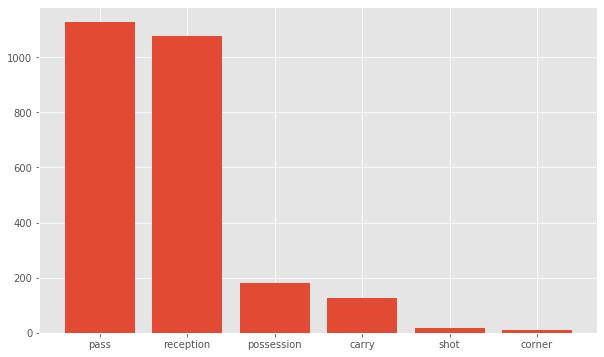

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(df_marking.groupby('markingType').count().sort_values('id', ascending=False).iloc[:, 0].index, df_marking.groupby('markingType').count().sort_values('id', ascending=False).iloc[:, 0].values)

Lots and lots of passes and receptions, may be more beneficial to analyze than individual shots. 

In [12]:
pass_optaid = df_marking[df_marking['markingType'] == 'pass']['optaId'] #optaID of all passes

In [13]:
passing_df = df_marking[df_marking['markingType'] == 'pass'] #creating df of only passes

In [14]:
pass_receive = df_marking[(df_marking['markingType'] == 'reception') | (df_marking['markingType'] == 'pass')].reset_index(drop=True) #creating df of passes and receptions

In [15]:
# feature engineering to create 'passOutcome' column. Takes into account team in possession, and the receiver

pass_receive['passOutcome'] = 'None'

for i in range(pass_receive.shape[0]):
    if pass_receive['markingType'][i] == 'pass':
        if pass_receive['receiverId'][i] == pass_receive['playerId'][i+1]:
            pass_receive['passOutcome'][i] = 'successful'
        if type(pass_receive['receiverId'][i]) != float and pass_receive['attTeamId'][i] == pass_receive['attTeamId'][i+1]:
             pass_receive['passOutcome'][i] = 'incomplete'
        if type(pass_receive['receiverId'][i]) != float and pass_receive['attTeamId'][i] == pass_receive['defTeamId'][i+1]:
                pass_receive['passOutcome'][i] = 'turnover'

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


I think I want to take a direction analyzing passes and their success in certain areas of the field... I think this could give some intuition to whether or not we need to improve in certain areas of the field or possess differently in those areas of the field

Current block is how to I know if the pass in `passing_df` is successful or not. Going to look at opta and perhaps merge the passing with the receiving rows to get more clarity 


Performed feature engineering to create pass outcome column.

* If type is pass and receiverid is equal to next row playerid: **successful**
* If type is pass and receiverid is nan but attTeamId does not change: **incomplete pass (not a turnover)**
* If type is pass and receiverid is nan and attTeamId changes in the next row: **turnover**

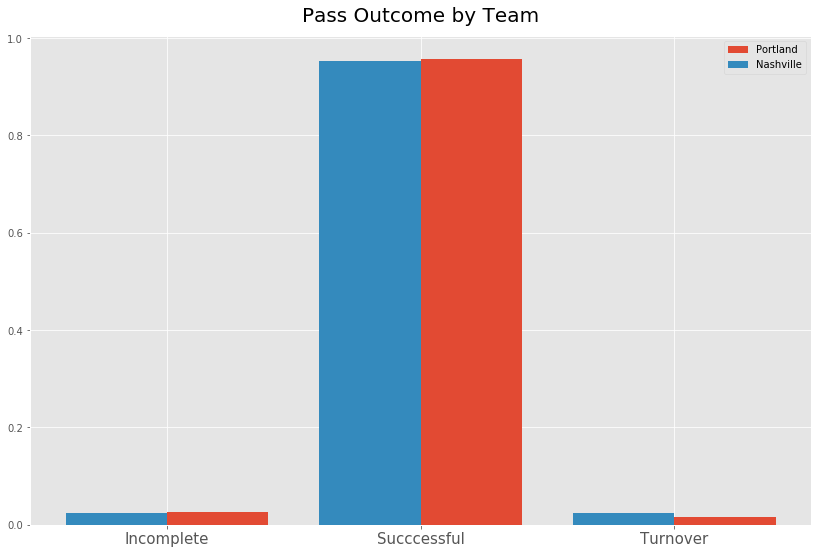

In [133]:
plt.figure(figsize=(14,9))
plt.bar(np.arange(3) + 0.2, pass_receive[pass_receive['attTeamId'] == 1581.0].groupby('passOutcome').count().iloc[:, 0].values / 536, width=0.4, label='Portland')
plt.bar(np.arange(3) - 0.2, pass_receive[pass_receive['attTeamId'] == 15154.0].groupby('passOutcome').count().iloc[:, 0].values / 591, width=0.4, label='Nashville')
plt.legend()
plt.title('Pass Outcome by Team', size=20, pad=14)
plt.xticks(ticks=np.arange(3), labels=['Incomplete', 'Succcessful', 'Turnover'], size=15)
#plt.savefig('../Visuals/passoutcome_byteam.png', dpi=100)

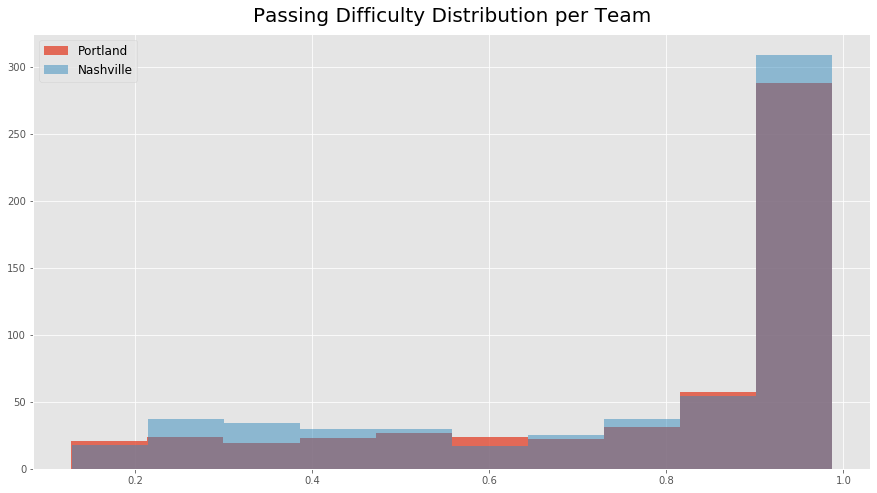

In [136]:
plt.figure(figsize=(15,8))
plt.hist(df_marking[(df_marking['markingType'] == 'pass') & (df_marking['attTeamId'] == 1581.0)]['passDifficulty'], label='Portland', alpha=0.8)
plt.hist(df_marking[(df_marking['markingType'] == 'pass') & (df_marking['attTeamId'] != 1581.0)]['passDifficulty'], label='Nashville', alpha=0.5)
plt.legend(fontsize='large')
plt.title('Passing Difficulty Distribution per Team', size=20, pad=12)
#plt.savefig('../Visuals/passingdifficulty_byteam.png', dpi=100)

Text(0.5, 1.0, 'Number of Passes per team')

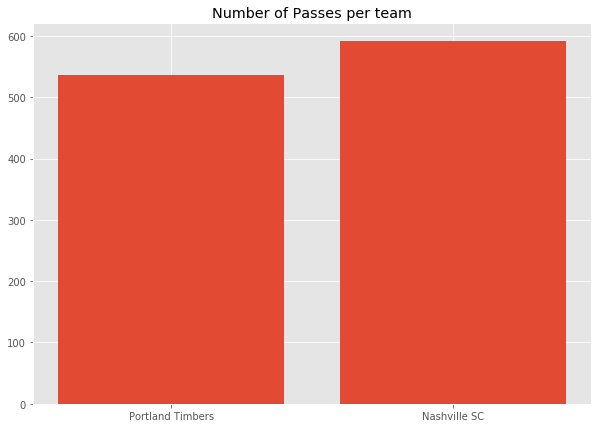

In [18]:
plt.figure(figsize=(10,7))
plt.bar(['Portland Timbers', 'Nashville SC'], df_marking[df_marking['markingType'] == 'pass'].groupby('attTeamId').count()['id'].values) 
plt.title('Number of Passes per team')

In [19]:
df_marking[(df_marking['markingType'] == 'pass') & (df_marking['attTeamId'] != 1581.0)].groupby('direction').count()['id'].values.sum()

591

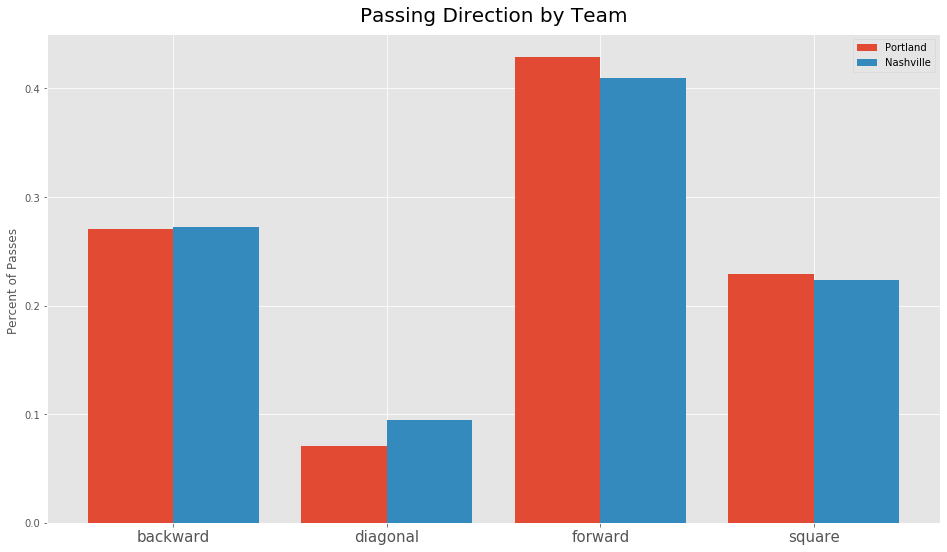

In [146]:
plt.figure(figsize=(16,9))
plt.bar(np.arange(4) - 0.2, df_marking[(df_marking['markingType'] == 'pass') & (df_marking['attTeamId'] == 1581.0)].groupby('direction').count()['id'].values / 536, width=0.4, label='Portland')
plt.bar(np.arange(4) + 0.2, df_marking[(df_marking['markingType'] == 'pass') & (df_marking['attTeamId'] != 1581.0)].groupby('direction').count()['id'].values / 591, width=0.4, label='Nashville')
plt.legend()
plt.title('Passing Direction by Team', size=20, pad=12)
plt.ylabel('Percent of Passes ')
plt.xticks(ticks = np.arange(4), labels=df_marking[(df_marking['markingType'] == 'pass') & (df_marking['attTeamId'] == 1581.0)].groupby('direction').count()['id'].index, size=15)
#plt.savefig('../Visuals/passingdirection_team.png', dpi=100)

attTeamId refers to opta id of passing team 

1581 are Portland Timbers

15154 are Nashville SC



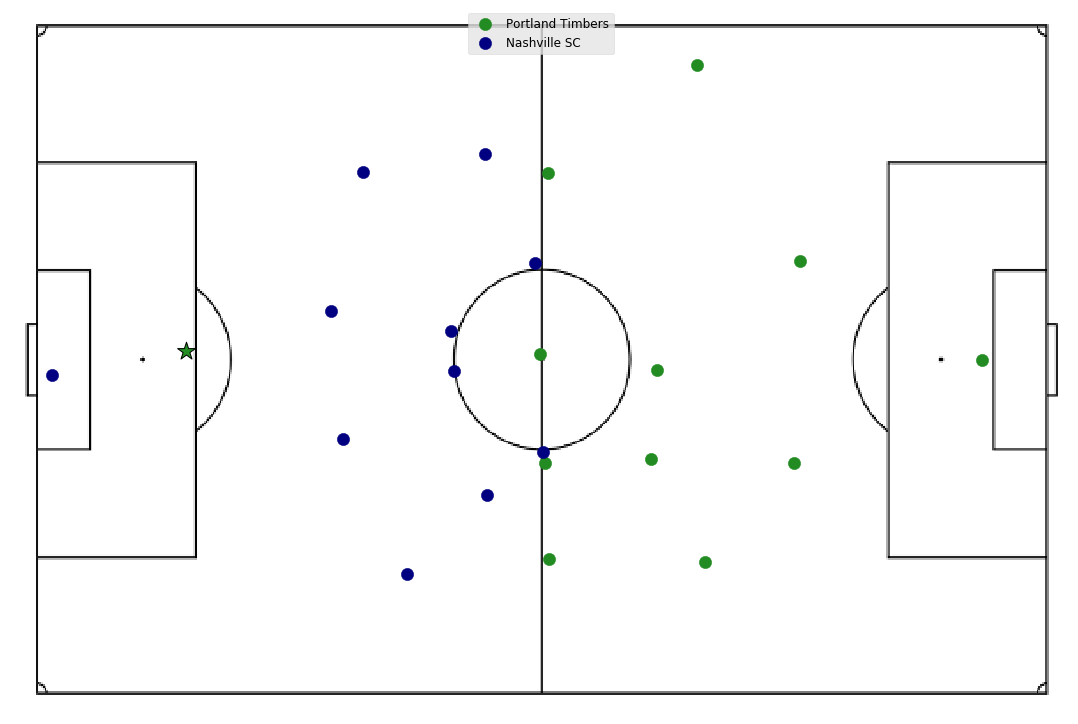

Time of Frame: 5.64 minutes


In [21]:
plotting_player_location_frame(3524)

Taking a deeper look at passes and their outcomes

In [127]:
#pass_receive.to_csv('../data/passing_pos.csv')  #saving pass_receive to csv to preserve feature engineered passOutcome column

In [147]:
passes_outcomes = pass_receive[pass_receive['markingType'] == 'pass']

In [148]:
passes_outcomes['passLoc'] = passes_outcomes['passLoc'].apply(lambda x: ast.literal_eval(x))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
passes_outcomes[['passLoc_x','passLoc_y', 'passLoc_z']] = pd.DataFrame(passes_outcomes['passLoc'].tolist(), index=passes_outcomes.index)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [150]:
passes_outcomes[['passLoc_x','passLoc_y', 'passLoc_z']].describe()

,passLoc_x,passLoc_y,passLoc_z
count,1127.000000,1127.000000,1127.0
mean,-0.635785,-15.191775,0.0
std,21.786864,30.085889,0.0
min,-49.600000,-67.980000,0.0
25%,-15.090000,-42.690000,0.0
50%,-0.320000,-14.950000,0.0
75%,15.275000,12.400000,0.0
max,50.250000,35.430000,0.0


In [151]:
passes_outcomes

,id,optaId,gameId,period,sequenceIdx,markingType,gameClock,wallClock,frameIdx,attTeamId,defTeamId,playerId,passerDefId,passerDefDist,receiverId,vel,air,breaksOffsideLine,passLoc,direction,defBehindPasser,defBehindReceiver,attAheadPasser,attAheadReceiver,defBypassed,passDifficulty,defInBox,attInBox,passerVel,events,startClock,endClock,startWallClock,endWallClock,startFrameIdx,endFrameIdx,teamId,isContested,startType,teamXg,verticalPassing,verticalCarrying,receptionLoc,receptionVel,startLoc,endLoc,distance,shooterId,shotLoc,goalDist,shooterDefDist,shooterDefId,defGoalside,xG,gkDist,gkVel,gkLoc,takerId,attInGkBox,defInGkBox,shortOption,nearPostDefender,farPostDefender,crossSwing,passOutcome,passLoc_x,passLoc_y,passLoc_z
0,54eb45e2-1933-45b8-99d2-87afdd7e440d,2.190066e+09,2044262,1,0,pass,0.04,1.583709e+12,1.0,1581.0,15154.0,55817.0,41626.0,8.45,96622.0,"[10.89, -4.75]",False,False,"[-0.32, -16.54, 0.0]",backward,7.0,11.0,0.0,4.0,-4.0,0.9694,1.0,0.0,"[0.49, -5.64]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful,-0.32,-16.54,0.0
2,68b4e18d-cb3f-437b-a72d-0a51569b1093,2.190066e+09,2044262,1,0,pass,2.32,1.583709e+12,58.0,1581.0,15154.0,96622.0,202376.0,6.70,131840.0,"[12.16, 91.22]",False,False,"[-12.5, -18.7, 0.0]",square,11.0,11.0,5.0,6.0,0.0,0.9404,1.0,0.0,"[2.45, -79.78]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful,-12.50,-18.70,0.0
4,8dff78d4-53ce-4378-a674-94724c6f8d6c,2.190066e+09,2044262,1,0,pass,4.40,1.583709e+12,110.0,1581.0,15154.0,131840.0,213665.0,4.70,85417.0,"[14.15, -63.37]",False,False,"[-11.88, -54.69, 0.0]",backward,11.0,11.0,6.0,7.0,0.0,0.9871,1.0,0.0,"[3.62, 50.44]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful,-11.88,-54.69,0.0
6,2465c502-7efb-4892-ba0b-18522cab0b02,2.190066e+09,2044262,1,0,pass,8.80,1.583709e+12,220.0,1581.0,15154.0,85417.0,NaN,15.29,45092.0,"[14.96, -105.5]",False,False,"[-26.44, -0.49, 0.0]",square,11.0,11.0,7.0,6.0,0.0,0.9861,1.0,0.0,"[2.1, 33.31]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful,-26.44,-0.49,0.0
8,e23074fc-ad4d-4b9a-9f82-cbc38d79d949,2.190066e+09,2044262,1,0,pass,12.88,1.583709e+12,322.0,1581.0,15154.0,45092.0,126174.0,7.29,85417.0,"[13.68, 36.35]",False,False,"[-15.51, 24.11, 0.0]",backward,11.0,11.0,6.0,8.0,0.0,0.9575,1.0,0.0,"[1.47, -46.33]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful,-15.51,24.11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,ca380131-35bd-4b74-981a-73fc0abe7140,2.190081e+09,2044262,2,0,pass,2935.04,1.583716e+12,73376.0,1581.0,15154.0,45092.0,41626.0,5.82,235290.0,"[9.53, -135.0]",False,False,"[22.03, 26.12, 0.0]",forward,8.0,8.0,3.0,3.0,0.0,0.8816,3.0,0.0,"[1.36, 17.91]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful,22.03,26.12,0.0
2195,4ab38d1a-2e25-4a50-934d-61c424e02595,2.190081e+09,2044262,2,0,pass,2939.20,1.583716e+12,73480.0,1581.0,15154.0,235290.0,41626.0,1.22,217784.0,"[14.63, 72.82]",False,False,"[13.81, 31.24, 0.0]",square,9.0,6.0,5.0,4.0,3.0,0.7366,1.0,0.0,"[3.17, 179.35]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful,13.81,31.24,0.0
2197,40b56d1b-7b3d-4048-a38e-e14460c92358,2.190082e+09

In [29]:
#finding all indices of each outcome to plot on field
success = []
incomplete = []
turnover = []

for index in pass_receive[pass_receive['attTeamId'] == 15154.0].index:
    if pass_receive[pass_receive['attTeamId'] == 15154.0]['passOutcome'][index] == 'successful':
        locs = passes_outcomes['passLoc'][index]
        success.append(locs)
        
    if pass_receive[pass_receive['attTeamId'] == 15154.0]['passOutcome'][index] == 'incomplete':
        locs = passes_outcomes['passLoc'][index]
        incomplete.append(locs)
        
    if pass_receive[pass_receive['attTeamId'] == 15154.0]['passOutcome'][index] == 'turnover':
        locs = passes_outcomes['passLoc'][index]
        turnover.append(locs)

In [30]:
success_arr = np.array(success)
incomplete_arr = np.array(incomplete)
turnover_arr = np.array(turnover)

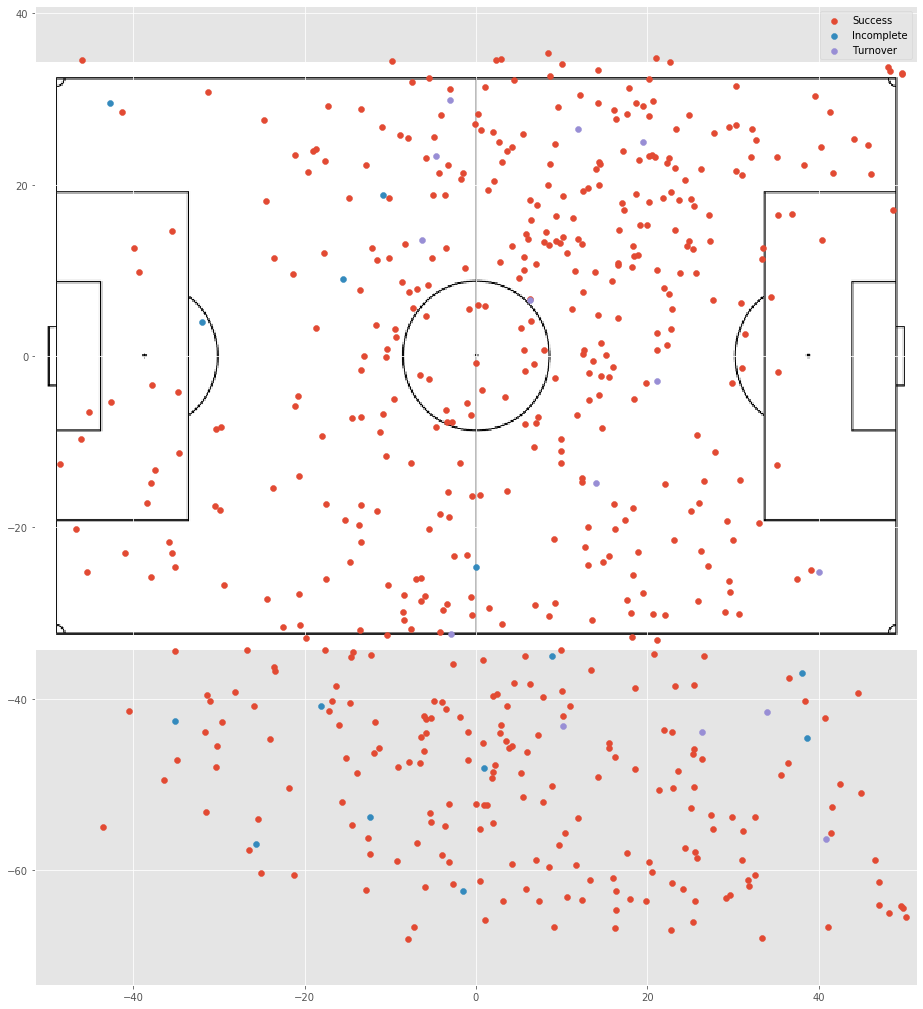

In [31]:
fig, ax1 = plt.subplots(figsize=(19, 18))  
img = plt.imread('../printable-soccer-field-diagram.png')
ax1.imshow(img, extent=(-51.44, 51.44, -34.29, 34.29))


plt.scatter(success_arr[:, 0], success_arr[:, 1], label='Success')  
plt.scatter(incomplete_arr[:, 0], incomplete_arr[:, 1], label='Incomplete')  
plt.scatter(turnover_arr[:, 0], turnover_arr[:, 1], label='Turnover')
plt.legend()


Something is wrong here, I am finding out that the tracking coordinate system must be different than the marking system. 

Plan is to find the frame index of each pass and then plot the ball location using the tracking data. 

In [32]:
success_idx = []
incomplete_idx = []
turnover_idx = []

#grabbing indicies of nashville by passing outcome type
# appending frameIdx to lists to plot using tracking coordinate system

for index in passes_outcomes[passes_outcomes['attTeamId'] == 15154.0].index:
    if passes_outcomes['passOutcome'][index] == 'successful':
        success_idx.append(passes_outcomes['frameIdx'][index])
        
    if passes_outcomes['passOutcome'][index] == 'incomplete':
        incomplete_idx.append(passes_outcomes['frameIdx'][index])
        
    if passes_outcomes['passOutcome'][index] == 'turnover':
        turnover_idx.append(passes_outcomes['frameIdx'][index])

In [80]:
df_tracking[df_tracking['period'] == 2].isna().sum()

period             0
frameIdx           0
gameClock          0
wallClock          0
homePlayers        0
awayPlayers        0
live               0
lastTouch          0
ball.xyz       25567
ball.speed         0
dtype: int64

* 14947 missing values in period 1
* 25567 missing values in period 2

In [77]:
tracking_na = df_tracking.dropna() #Many missing values here, not sure if I will be allowed to plot the ball location for all passes

In [83]:
tracking_na['ball.xyz'] = tracking_na['ball.xyz'].apply(lambda x: ast.literal_eval(x)) #converting string to list

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
tracking_na[['ball_x','ball_y', 'ball_z']] = pd.DataFrame(tracking_na['ball.xyz'].tolist(), index=tracking_na.index) #popping out x y and z locs

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [153]:
tracking_na.head()

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,live,lastTouch,ball.xyz,ball.speed,ball_x,ball_y,ball_z
0,1,0,0.00,1583709073745,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",False,home,"[0.7, 0.04, 0.16]",11.63,0.70,0.04,0.16
1,1,1,0.04,1583709073785,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[0.84, 0.01, 0.16]",11.70,0.84,0.01,0.16
2,1,2,0.08,1583709073825,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[1.19, -0.01, 0.16]",11.64,1.19,-0.01,0.16
3,1,3,0.12,1583709073865,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[1.74, -0.04, 0.16]",11.60,1.74,-0.04,0.16
4,1,4,0.16,1583709073905,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[2.18, -0.14, 0.16]",11.55,2.18,-0.14,0.16


In [86]:
tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(success_idx)] #all success passes in tracking for first half

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,live,lastTouch,ball.xyz,ball.speed,ball_x,ball_y,ball_z
1,1,1,0.04,1583709073785,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[0.84, 0.01, 0.16]",11.70,0.84,0.01,0.16
24,1,24,0.96,1583709074705,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[10.52, -0.02, 0.13]",7.01,10.52,-0.02,0.13
80,1,80,3.20,1583709076945,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[12.36, 17.07, 0.13]",12.12,12.36,17.07,0.13
450,1,450,18.00,1583709091745,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[19.5, 16.42, 0.13]",5.83,19.50,16.42,0.13
623,1,623,24.92,1583709098665,"[{'playerId': '41004', 'number': 33, 'xyz': [0...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-44.08, 4.58, 1.21]",0.93,-44.08,4.58,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67918,1,67918,2716.72,1583711790465,"[{'playerId': '41004', 'number': 33, 'xyz': [9...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-37.09, -6.31, 0.37]",8.91,-37.09,-6.31,0.37
68181,1,68181,2727.24,1583711800985,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[2.81, -20.88, 0.12]",7.36,2.81,-20.88,0.12
68247,1,68247,2729.88,1583711803625,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[7.97, -12.4, 0.94]",14.66,7.97,-12.40,0.94
68412,1,68412,2736.48,1583711810225,"[{'playerId': '41004', 'number': 33, 'xyz': [4...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[43.33, 25.59, 0.14]",7.09,43.33,25.59,0.14


In [87]:
tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(incomplete_idx)] #all incomplete passes in tracking for first half

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,live,lastTouch,ball.xyz,ball.speed,ball_x,ball_y,ball_z
4726,1,4726,189.04,1583709262785,"[{'playerId': '41004', 'number': 33, 'xyz': [1...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-9.1, 23.71, 0.28]",15.31,-9.10,23.71,0.28
9067,1,9067,362.68,1583709436425,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[20.11, -27.31, 4.4]",12.42,20.11,-27.31,4.40
13420,1,13420,536.80,1583709610545,"[{'playerId': '41004', 'number': 33, 'xyz': [-...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-33.84, -19.19, -0.04]",10.05,-33.84,-19.19,-0.04
16145,1,16145,645.80,1583709719545,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[-15.45, -33.36, 0.16]",3.84,-15.45,-33.36,0.16
20118,1,20118,804.72,1583709878465,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[8.62, 26.4, 0.14]",2.53,8.62,26.40,0.14
28269,1,28269,1130.76,1583710204505,"[{'playerId': '41004', 'number': 33, 'xyz': [5...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-25.0, -26.87, 0.25]",2.74,-25.00,-26.87,0.25
39109,1,39109,1564.36,1583710638105,"[{'playerId': '41004', 'number': 33, 'xyz': [-...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-41.56, 31.53, 0.27]",5.35,-41.56,31.53,0.27
42802,1,42802,1712.08,1583710785825,"[{'playerId': '41004', 'number': 33, 'xyz': [4...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-1.31, 0.2, 5.76]",12.03,-1.31,0.20,5.76
45891,1,45891,1835.64,1583710909385,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[28.76, -1.39, 0.12]",3.14,28.76,-1.39,0.12
47578,1,47578,1903.12,1583710976865,"[{'playerId': '41004', 'number': 33, 'xyz': [9...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-12.2, -25.59, 0.34]",5.38,-12.20,-25.59,0.34


In [107]:
tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_idx)].shape #turnover passes only 12 in first half

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(12, 13)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Location of Start of Pass by Outcome')

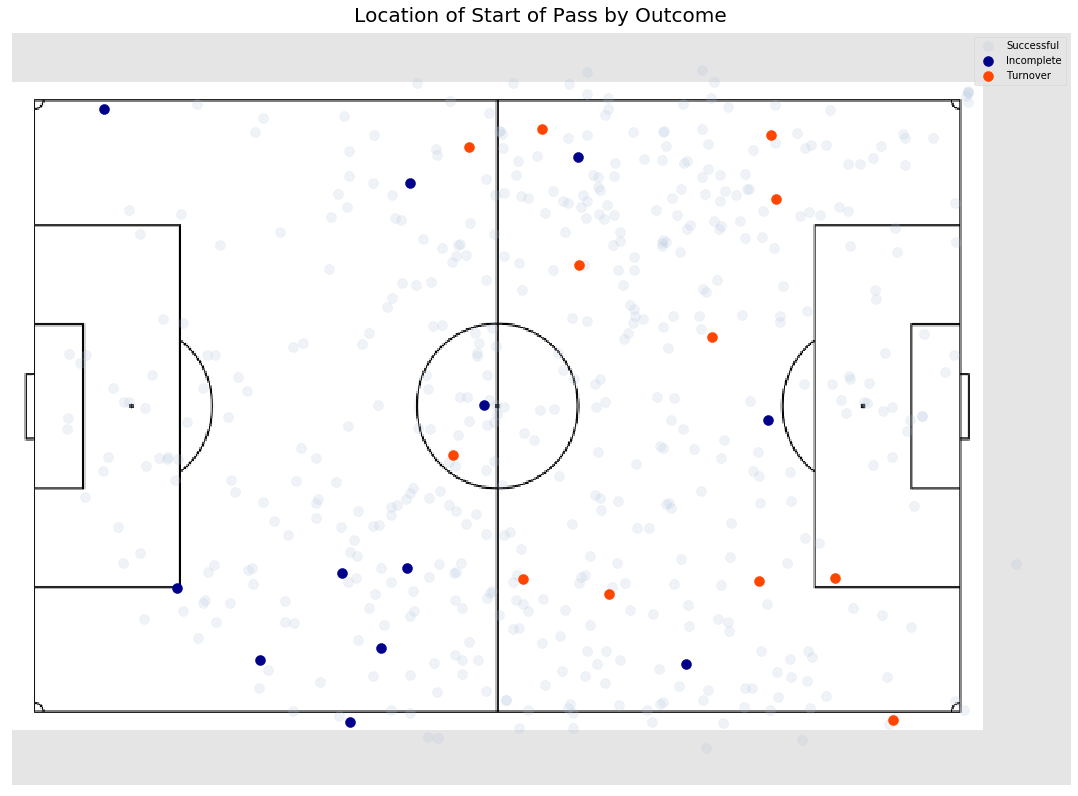

In [106]:
fig, ax = plt.subplots(figsize=(19, 18))
    
img = plt.imread('../printable-soccer-field-diagram.png')
ax.imshow(img, extent=(-51.44, 51.44, -34.29, 34.29))

plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(success_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(success_idx)]['ball_y'], alpha=0.20, s=100, label='Successful', c='lightsteelblue')
plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(incomplete_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(incomplete_idx)]['ball_y'], s=100, label='Incomplete', c='darkblue')
plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_idx)]['ball_y'], s=100, label='Turnover', c='orangered')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.title('Location of Start of Pass by Outcome', size=20, pad=10)

We can see from this plot that only 2 of the 12 turnovers in the first half occured on Nashville's half of the field.

We can also see that several incomplete passes occurred on the right flank of Nashville's defensive half. --> This could definitely be examined more and determined who is making that pass and why do we continue making incomplete passes in this area 

## Taking a look at possessions

Text(0.5, 1.0, 'Possession Start by Type')

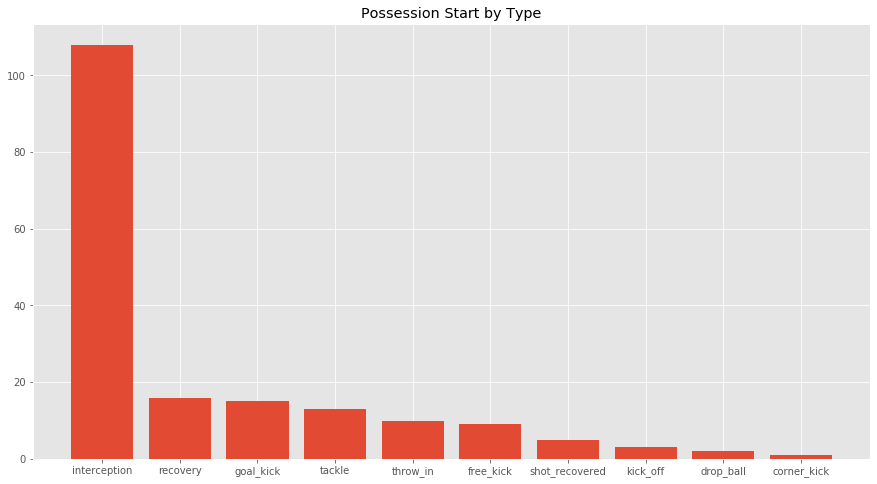

In [118]:
plt.figure(figsize=(15, 8))
plt.bar(df_marking[df_marking['markingType'] == 'possession'].groupby('startType').count().sort_values(by='id', ascending=False).iloc[:, 0].index, df_marking[df_marking['markingType'] == 'possession'].groupby('startType').count().sort_values(by='id', ascending=False).iloc[:, 0].values)
plt.title('Possession Start by Type')


In [119]:
df_marking[df_marking['markingType'] == 'possession']

,id,optaId,gameId,period,sequenceIdx,markingType,gameClock,wallClock,frameIdx,attTeamId,defTeamId,playerId,passerDefId,passerDefDist,receiverId,vel,air,breaksOffsideLine,passLoc,direction,defBehindPasser,defBehindReceiver,attAheadPasser,attAheadReceiver,defBypassed,passDifficulty,defInBox,attInBox,passerVel,events,startClock,endClock,startWallClock,endWallClock,startFrameIdx,endFrameIdx,teamId,isContested,startType,teamXg,verticalPassing,verticalCarrying,receptionLoc,receptionVel,startLoc,endLoc,distance,shooterId,shotLoc,goalDist,shooterDefDist,shooterDefId,defGoalside,xG,gkDist,gkVel,gkLoc,takerId,attInGkBox,defInGkBox,shortOption,nearPostDefender,farPostDefender,crossSwing
1,c64799ad-5792-42a2-9c86-5af6b55b2242,NaN,2044262,1,0,possession,NaN,NaN,NaN,NaN,15154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['54eb45e2-1933-45b8-99d2-87afdd7e440d', '68b4...",0.04,24.56,1.583709e+12,1.583709e+12,1.0,614.0,1581.0,False,kick_off,0.0000,62.30,26.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,970558b2-8ad5-448a-8973-b55b2f8868f7,NaN,2044262,1,0,possession,NaN,NaN,NaN,NaN,1581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['21ca3f0c-a8c7-4bc3-821e-b616caac732a', '7065...",24.56,53.84,1.583709e+12,1.583709e+12,614.0,1346.0,15154.0,False,interception,0.0000,20.39,7.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,f1b16ef0-0299-42eb-90d1-e33e95006230,NaN,2044262,1,0,possession,NaN,NaN,NaN,NaN,15154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['32d3bd35-c33d-46ae-ab9d-780eae3e8f43', 'e27d...",53.84,60.72,1.583709e+12,1.583709e+12,1346.0,1518.0,1581.0,False,interception,0.0000,40.80,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,a138d9f3-e985-4179-ac5a-12f33ec590e2,NaN,2044262,1,0,possession,NaN,NaN,NaN,NaN,1581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['c6d3ad97-1db4-4396-9334-9a3f14a331a9'],69.52,72.64,1.583709e+12,1.583709e+12,1738.0,1816.0,15154.0,False,throw_in,0.0000,22.30,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,0819fcc0-12ce-4c8f-b2df-4a41b68d4f7d,NaN,2044262,1,0,possession,NaN,NaN,NaN,NaN,15154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['797acfdb-a2dd-4305-bc33-573b91644780', '03ab...",72.64,79.92,1.583709e+12,1.583709e+12,1816.0,1998.0,1581.0,False,interception,0.0000,59.82,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,c97017c1-7e6f-463b-a438-6d8cd593a517,NaN,2044262,2,0,possession,NaN,NaN,NaN,NaN,15154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['a42b4457-8be0-4d77-b779-b33e26c321de', 'd80e...",2831.76,2838.84,1.583716e+12,1.583716e+12,70794.0,70971.0,1581.0,False,interception,0.0000,33.15,5.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2500,ad69f678-cdce-46ab-b8d9-272c39797a62,NaN,2044262,2,0,possession,NaN,NaN,NaN,NaN,1581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['76154475-facd-4dd4-9238-78a9c7b99add', 'f6ab...",2838.84,2847.32,1.583716e+12,1.583716e+12,70971.0,71183.0,15154.0,False,interception,0.0288,35.57,10.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,12080672-f0ec-4cb2-896a-7a6021f8b280,NaN,2044262,2,0,possession,NaN,NaN,NaN,NaN,15154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['35cd1d39-2b90-44b6-9bc0-5ebe7f8f9beb'],2875.84,2879.40,1.583716e+12,1.583716e+12,71896.0,71985.0,1581.0

### Process

The most difficult about this process moving forward is the direction I want to go with it. With an open ended project The most difficult part is going to be finding that direction. 

We have a game, and many many metrics and data points from that game. I want to figure out what can we do with this data that is going to benefit us moving forward. 

There is one main goal in soccer:

1. Scoring more goals than the opposition

So we want to make sure we do that. But how do we accomplish that? All of the things that make up the game are:

* Tactic - what sort of tactic does a team take to be successful
* Shape - how do they implement this tactic with the way they set up
* Ability - we need players that understand the game, meet the physical and fitness standards and can execute the tactic and shape

My biggest question: **How do we translate these deilverables into data driven statistics?**

